In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
df = pd.read_excel('/kaggle/input/datakppetrokimia2025/SO Outstanding Adminjul 15 Juli 2025.xlsx')
df.head()

,Nomor Kontrak,Nomor Sales Order,Deskripsi Material,Tanggal SO Dibuat,Nama Distributor,Quantity SO,PGI qty,Outstanding SO,Billing Quantity,Tanggal PGI,...,Harga Total(Incl PPn),Total,Harga Jual (exc. PPN),Sektor,Tanggal Dokumen,Tanggal SO Released,Provinsi Distributor,Kabupaten Distributor,Distributor,Nomor Material
0,2.100073e+09,3101295142,Kaptan @50KG,2025-05-14,YASIDA MAKMUR ABADI,5.0,5.0,0.0,5.0,23-05-2025,...,1500000,1351351,270270,KEBUN,2025-05-14,2025-05-14,JAWA TIMUR,KAB. GRESIK,1000002467,1000274
1,2.100073e+09,3101295142,Petrocas @50KG,2025-05-14,YASIDA MAKMUR ABADI,5.0,5.0,0.0,5.0,23-05-2025,...,1475000,1328829,265766,KEBUN,2025-05-14,2025-05-14,JAWA TIMUR,KAB. GRESIK,1000002467,1000272
2,2.100073e+09,3101295232,Kaptan @50KG,2025-05-14,DOHAR AGRO MANDIRI,24.0,24.0,0.0,24.0,19-05-2025,...,7200000,6486487,270270,KEBUN,2025-05-14,2025-05-14,BENGKULU,KOTA BENGKULU,1000001444,1000274
3,2.100072e+09,3101295279,"NPK 13-6-27 +4Mg+0,65B NS @50KG",2025-05-14,BUKIT AGROCHEMICAL BARU,24.0,24.0,0.0,24.0,14-05-2025,...,161172000,145200000,6050000,KEBUN,2025-05-14,2025-05-14,KALIMANTAN TENGAH,KAB. LAMANDAU,1000006971,1000092
4,2.100073e+09,3101295310,Neutralized Crude Gypsum,2025-05-14,GRESIK CIPTA SEJAHTERA,500.0,500.0,0.0,500.0,"14-05-2025, 15-05-2025, 15-05-2025, 16-05-2025...",...,39960000,36000000,72000,INDUSTRI,2025-05-14,2025-05-14,JAWA TIMUR,KAB. GRESIK,2000000058,1001970


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Nomor Kontrak          3367 non-null   float64       
 1   Nomor Sales Order      3453 non-null   int64         
 2   Deskripsi Material     3453 non-null   object        
 3   Tanggal SO Dibuat      3453 non-null   datetime64[ns]
 4   Nama Distributor       3453 non-null   object        
 5   Quantity SO            3453 non-null   float64       
 6   PGI qty                3453 non-null   float64       
 7   Outstanding SO         3453 non-null   float64       
 8   Billing Quantity       3453 non-null   float64       
 9   Tanggal PGI            3305 non-null   object        
 10  Incoterm 1             3453 non-null   object        
 11  Incoterm 2             3453 non-null   object        
 12  End User/Pengecer      3439 non-null   object        
 13  SO 

In [4]:
print("Total Client Masih Kotor: ", df['Nama Distributor'].nunique())

Total Client Masih Kotor:  326


In [5]:
print(df['Nama Distributor'].unique())

['YASIDA MAKMUR ABADI' 'DOHAR AGRO MANDIRI' 'BUKIT AGROCHEMICAL BARU'
 'GRESIK CIPTA SEJAHTERA' 'AHIMSA BANGKIT UTAMA' 'TANINDO PERKASA'
 'STANLEY CHEMINDO' 'TUMBUH BERKEMBANG' 'PETRO KARYA MANDIRI'
 'PURNA BUANA YUDHA' 'BERLIAN MAKMUR' 'STAR GOOD HERO'
 'KOPINDO CIPTA SEJAHTERA' 'INDONESIA ASAHAN ALUMINIUM' 'BUANA PRIMA'
 'LADANG HIJAU' 'CAHAYA ABADI MENES' 'PERTIWI TANI' 'ALAM KARIMA'
 'CIPTA NIAGA INDONESIA' 'ROSMALA MULTI SARANA EXPRES' 'BUMI LAWU MANDIRI'
 'ADI JAYA MANDIRI' 'LABAN RAYA SAMODRA' 'MUJIARTO' 'FIMACO'
 'ABK MITRA MANDIRI' 'LADANG INDONESIA CITRA MANDIRI' 'SUGESTY'
 'PREMIERE MAKMUR ANUGRAH' 'UNITAMA MAKMUR ABADI' 'SEDIA JAYA' 'AL  AIZAR'
 'WATAMA PRIMA' 'ADIKERSA MARTAPURA AMARTYA' 'SATONA' 'LIKU TELAGA'
 'SINAR BUANA LOGISTIK' 'UNIVERSAL AGRO CHEMINDO'
 'BERLIAN INTI SUKSES PERKASA' 'TANI MUDA SULAWESI' 'INDO DINO TRADINDO'
 'SEHAT CEMERLANG SEJAHTERA' 'PETROSIDA GRESIK' 'BHAKTI NUSANTARA'
 'BUMI IMPERIUM INDONESIA' 'PUPUK ISKANDAR MUDA' 'ADITYA MANDIRI UTAMA'
 'SET

In [6]:
# Menghapus Dep. Pengelolaan Pelanggan karena bukan termasuk client
df = df[df['Nama Distributor']!='DEPT. PENGELOLAAN PELANGGAN']
print("Total Client Bersih: ", df['Nama Distributor'].nunique())

Total Client Bersih:  325


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, 0 to 3452
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Nomor Kontrak          3367 non-null   float64       
 1   Nomor Sales Order      3367 non-null   int64         
 2   Deskripsi Material     3367 non-null   object        
 3   Tanggal SO Dibuat      3367 non-null   datetime64[ns]
 4   Nama Distributor       3367 non-null   object        
 5   Quantity SO            3367 non-null   float64       
 6   PGI qty                3367 non-null   float64       
 7   Outstanding SO         3367 non-null   float64       
 8   Billing Quantity       3367 non-null   float64       
 9   Tanggal PGI            3228 non-null   object        
 10  Incoterm 1             3367 non-null   object        
 11  Incoterm 2             3367 non-null   object        
 12  End User/Pengecer      3353 non-null   object        
 13  SO Legac

In [8]:
#Mengambil Fitur Penting dalam Dataset
cols = [
    'Nomor Sales Order','Deskripsi Material','Nama Distributor','Quantity SO',
    'Harga/Ton(Incl PPn)','Harga Total(Incl PPn)',
    'Sektor','Tanggal SO Released','Provinsi Distributor'
]
df = df.loc[:, cols]
df.head()

,Nomor Sales Order,Deskripsi Material,Nama Distributor,Quantity SO,Harga/Ton(Incl PPn),Harga Total(Incl PPn),Sektor,Tanggal SO Released,Provinsi Distributor
0,3101295142,Kaptan @50KG,YASIDA MAKMUR ABADI,5.0,300000,1500000,KEBUN,2025-05-14,JAWA TIMUR
1,3101295142,Petrocas @50KG,YASIDA MAKMUR ABADI,5.0,295000,1475000,KEBUN,2025-05-14,JAWA TIMUR
2,3101295232,Kaptan @50KG,DOHAR AGRO MANDIRI,24.0,300000,7200000,KEBUN,2025-05-14,BENGKULU
3,3101295279,"NPK 13-6-27 +4Mg+0,65B NS @50KG",BUKIT AGROCHEMICAL BARU,24.0,6715500,161172000,KEBUN,2025-05-14,KALIMANTAN TENGAH
4,3101295310,Neutralized Crude Gypsum,GRESIK CIPTA SEJAHTERA,500.0,79920,39960000,INDUSTRI,2025-05-14,JAWA TIMUR


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, 0 to 3452
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Nomor Sales Order      3367 non-null   int64         
 1   Deskripsi Material     3367 non-null   object        
 2   Nama Distributor       3367 non-null   object        
 3   Quantity SO            3367 non-null   float64       
 4   Harga/Ton(Incl PPn)    3367 non-null   int64         
 5   Harga Total(Incl PPn)  3367 non-null   int64         
 6   Sektor                 3367 non-null   object        
 7   Tanggal SO Released    3367 non-null   datetime64[ns]
 8   Provinsi Distributor   3367 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 263.0+ KB


In [10]:
df.to_excel('data_kp_bersih.xlsx')

# Exploratory Data Analysis

In [11]:
# Create the copy of data so the data wouldn't be overwritten
df_eda = df.copy()

# Validate the shape of data
print("Shape of `df`:", df.shape)
print("Shape of `df_eda`:", df_eda.shape)

Shape of `df`: (3367, 9)
Shape of `df_eda`: (3367, 9)


In [12]:
df_eda.describe()

,Nomor Sales Order,Quantity SO,Harga/Ton(Incl PPn),Harga Total(Incl PPn),Tanggal SO Released
count,3.367000e+03,3367.000000,3.367000e+03,3.367000e+03,3367
mean,3.101273e+09,2357.066555,2.479350e+06,7.189438e+08,2025-03-24 10:21:25.179685120
min,3.101224e+09,0.500000,0.000000e+00,0.000000e+00,2024-12-02 00:00:00
25%,3.101248e+09,22.250000,2.950000e+05,1.056795e+07,2025-01-24 00:00:00
50%,3.101272e+09,53.000000,3.000000e+05,3.996000e+07,2025-03-21 00:00:00
75%,3.101300e+09,500.000000,5.350000e+06,3.842948e+08,2025-05-21 00:00:00
max,3.101327e+09,340334.000000,2.591850e+07,1.225436e+11,2025-07-15 00:00:00
std,2.963730e+04,18830.277386,3.792724e+06,4.509448e+09,NaN


* All values is positive, which is rational because neither of value can be negative
* There are potential outlier in Quantity SO and Harga Total(Incl PPn). Need further analysis to proof

In [13]:
#check posibilities of missing value
df_eda.isna().sum()

Nomor Sales Order        0
Deskripsi Material       0
Nama Distributor         0
Quantity SO              0
Harga/Ton(Incl PPn)      0
Harga Total(Incl PPn)    0
Sektor                   0
Tanggal SO Released      0
Provinsi Distributor     0
dtype: int64

From analysis above, we conclude that there is no missing value of the data

In [14]:
# Check First and Last Transaction in Dataset
print(f'Date of First Transaction is :', {str(df_eda["Tanggal SO Released"].min())})
print(f'Date of Last Transaction is :', {str(df_eda["Tanggal SO Released"].max())})

Date of First Transaction is : {'2024-12-02 00:00:00'}
Date of Last Transaction is : {'2025-07-15 00:00:00'}


From analysis above, we conclude that data consist of 8 months transaction

# Create RFM Features

Recency (R)
Recency refers to the time elapsed since a customer's last interaction or transaction with a company. It measures how recently a customer has engaged with the business

Frequency (F)
Frequency represents the number of transaction occurs. It measures how often a customer engages with the business.

Monetary (M)
Monetary refers to the total monetary value of a customer's transactions or purchases.

In [15]:
# Set the last trasaction data to became the reference date
last_trans_date = pd.to_datetime('2025-07-15 00:00:00')

last_trans_date

Timestamp('2025-07-15 00:00:00')

In [16]:
# Create function to make RFM Analysis
def recency_value(x):
    """"""
    return (last_trans_date - x.max()).days

def frequency_value(x):
    """"""
    return len(set(x))

def retrieve_rfms(df):
    """"""
    # Generate value of sales transaction --> Sales = Quantity SO x Harga/Ton(Incl PPn)
    df["Sales"] = df["Harga Total(Incl PPn)"]

    # Aggregate by 'Nama Distributor' to retrieve RFM
    dict_agg_data = {
        'Tanggal SO Released' : [recency_value],
        'Nomor Sales Order' : frequency_value,
        'Sales' : 'sum'
    }

    rfm_data = df.groupby('Nama Distributor').agg(dict_agg_data)

    # Change name of column
    rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

    return rfm_data

In [17]:
rfm_data_eda = retrieve_rfms(df = df_eda)
# Validate the output
# Rows of rfm_data_eda == unique number of Nama Distributor
print('Shape of RFM datashape :', rfm_data_eda.shape)
assert rfm_data_eda.shape[0] == len(set(df_eda['Nama Distributor']))

Shape of RFM datashape : (325, 3)


In [18]:
# Do sanity check
rfm_data_eda.head()

,Recency,Frequency,Monetary
Nama Distributor,,,
AAA,125,4,9125000000
ABADI AULIA JAYA,27,7,38920000
ABADI KIMIA,12,21,2545980638
ABK MITRA MANDIRI,35,3,18235000
ACME INDONESIA,4,1,6785000


In [19]:

# Check data description of `rfm_data_eda`
rfm_data_eda.describe()

,Recency,Frequency,Monetary
count,325.000000,325.000000,3.250000e+02
mean,54.203077,10.141538,7.448258e+09
std,58.997400,27.527511,4.122967e+10
min,0.000000,1.000000,8.850000e+05
25%,12.000000,2.000000,3.272500e+07
50%,29.000000,5.000000,1.200000e+08
75%,74.000000,9.000000,1.244595e+09
max,224.000000,441.000000,6.626955e+11


Based on EDA on statistical descriptive in rfm_data_eda, there is no negative value in all columns

In [20]:
# Check for frequency == 1 in rfm_data_eda
rfm_data_eda[rfm_data_eda['Frequency'] == 1]

,Recency,Frequency,Monetary
Nama Distributor,,,
ACME INDONESIA,4,1,6785000
AGRO NUSANTARA INDONESIA,20,1,4181006808
AGRO SANTANINDO,70,1,30000000
AGRO SENTOSA,187,1,41000000
AGRO SUMBER MAKMUR,96,1,4572500
...,...,...,...
TAZAR GUNA MANDIRI,166,1,3375000
TRANS AGRO SEJAHTERA,70,1,2950000
TRITUNGGAL MANDIRI,78,1,3360000000


There are 72 companies one on time purchaser

In [21]:
# Monetary
rfm_data_eda[rfm_data_eda['Frequency'] == 1]['Monetary'].describe()

count    7.200000e+01
mean     3.913302e+08
std      1.207503e+09
min      8.850000e+05
25%      5.187500e+06
50%      1.070000e+07
75%      4.275000e+07
max      8.003000e+09
Name: Monetary, dtype: float64

There are customers who be the one-time purchaser on data

Data Distribution 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


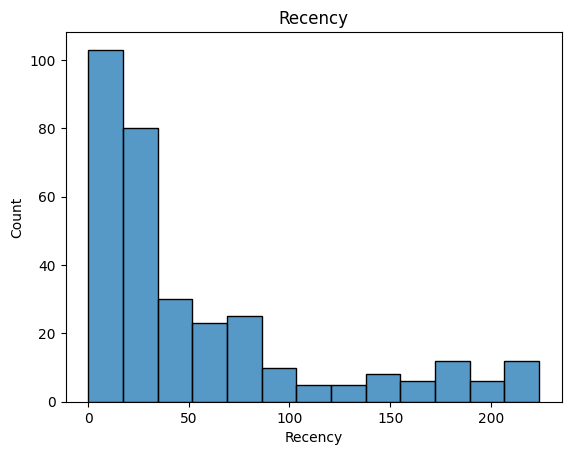

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


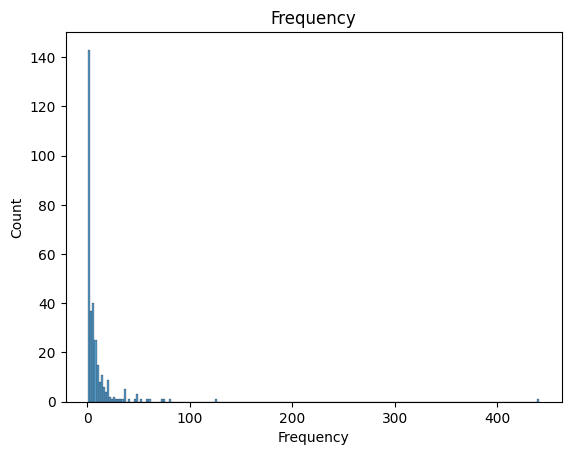

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


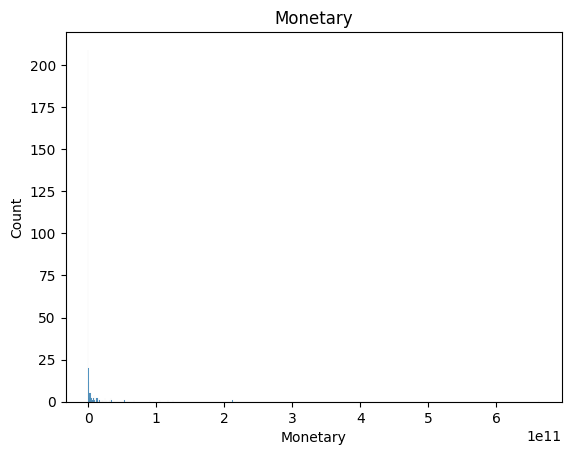

In [22]:
# Try to plot the distribution
for col in rfm_data_eda.columns:
    x = rfm_data_eda[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

There are many outliers. We will use Robust Scaler

In [23]:
rfm_data_eda.isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [24]:
rfm_data_eda.shape

(325, 3)

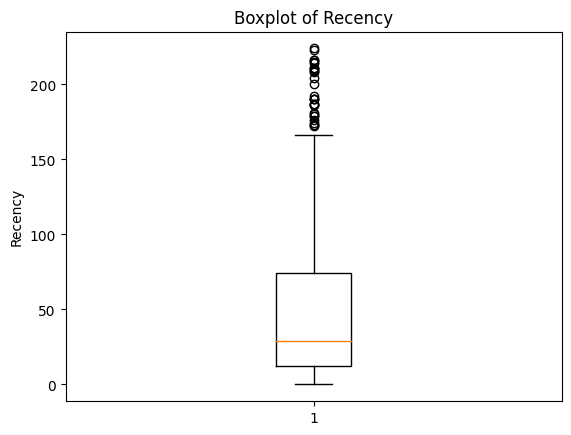

In [25]:
plt.boxplot(rfm_data_eda['Recency'])
plt.title('Boxplot of Recency')
plt.ylabel('Recency')
plt.show()

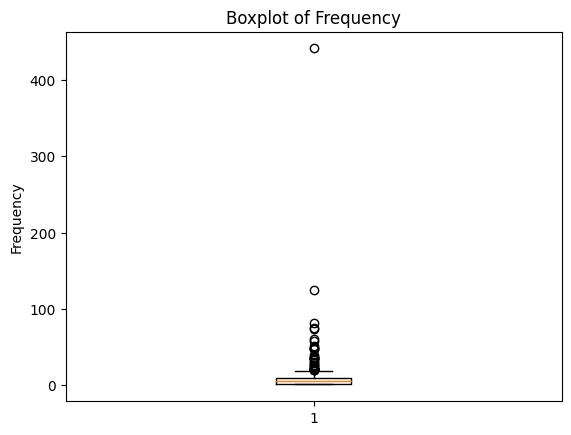

In [26]:
plt.boxplot(rfm_data_eda['Frequency'])
plt.title('Boxplot of Frequency')
plt.ylabel('Frequency')
plt.show()

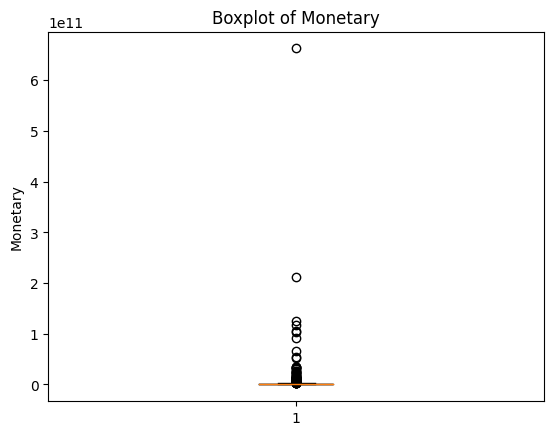

In [27]:
plt.boxplot(rfm_data_eda['Monetary'])
plt.title('Boxplot of Monetary')
plt.ylabel('Monetary')
plt.show()

Try further analysis to determine is there any outliers
Use IQR method to determine